<a href="https://colab.research.google.com/github/RaphaPUC/Entrega-MVP---Analise-de-Dados/blob/main/Projeto_MVP_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 MVP Sprint II – PUC-Rio | Ciência de Dados 2025  
**Aluno:** Raphael Matias  
**Tema:** Análise dos Dados do Airbnb – Rio de Janeiro  

---

## 🎯 Objetivo do Projeto

O Airbnb é uma das maiores plataformas de aluguel de curta duração do mundo. No Rio de Janeiro, cidade turística por excelência, a variedade de imóveis disponíveis é imensa — variando em localização, preço, tipo de acomodação e número de avaliações.

Neste projeto, realizamos uma **análise exploratória de dados (EDA)** com o intuito de compreender melhor o cenário atual da oferta de imóveis no Airbnb da cidade. O objetivo não é prever o futuro, mas **identificar padrões, levantar hipóteses e gerar insights úteis**, tanto para usuários quanto para anfitriões.

---

## 🔍 Questões Norteadoras

Durante a análise exploratória, buscamos responder as seguintes perguntas com base nos dados do Airbnb no Rio de Janeiro:

- A distribuição de preços e noites apresenta outliers que afetam a visualização dos dados?
- Existe alguma correlação entre as variáveis do dataset?
- Quais são os tipos de acomodação mais comuns no Airbnb?
- Quais bairros concentram os imóveis com os maiores preços?
- Quais bairros concentram mais imóveis anunciados?
- Qual o preço médio por tipo de imóvel?
- Os imóveis mais bem avaliados são também os mais baratos?
- Os imóveis estão disponíveis durante todo o ano ou apenas por períodos específicos?
- Quais bairros concentram o maior número de noites ocupadas?

---

## 📥 Fonte dos Dados

Os dados utilizados nesta análise foram obtidos por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data/), que disponibiliza dados públicos e atualizados da plataforma.

Para este projeto, foi utilizado o seguinte arquivo referente aos anúncios do Rio de Janeiro em 2025:

🔗 [Airbnb-RJ-2025.csv – GitHub](https://github.com/RaphaPUC/Entrega-MVP--Analise-de-Dados/blob/main/Airbnb-RJ-2025.csv)

---
⚠️ Este é um projeto de análise exploratória de dados (EDA), sem aplicação de técnicas supervisionadas ou algoritmos de predição. Com o objetivo de observar padrões, levantar hipóteses e interpretar relações entre variáveis com base em dados reais da plataforma Airbnb.


## Bibliotecas Utilizadas

Antes de iniciar a análise, é necessário importar os pacotes que serão usados ao longo do projeto:

- **pandas** e **numpy**: manipulação de dados e estruturas numéricas;
- **matplotlib** e **seaborn**: criação de gráficos e visualizações;
- **missingno**: visualização de valores ausentes no dataset;
- **IPython.display**: melhora a exibição de elementos como tabelas e textos formatados no notebook.

Além disso, foi exibida a versão da biblioteca `matplotlib` instalada no ambiente para fins de compatibilidade.


In [80]:
# importar os pacotes necessários
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl
from IPython.display import display, Markdown
## Verifica a versão da matplotlib instalada
mpl.__version__

'3.10.0'

## Definição da Paleta de Cores

Para garantir uma identidade visual agradável e acessível ao longo do projeto, foi definida uma paleta de cores baseada no mapa `viridis`, que é perceptível mesmo por pessoas com daltonismo.

- Foram extraídas **6 cores** distintas do colormap `viridis`, convertidas para código hexadecimal;
- A cor padrão a ser usada nos gráficos foi definida como a **segunda da sequência**;
- Além disso, aplicamos um estilo do `matplotlib` (`ggplot`) e ajustamos manualmente o fundo dos eixos, cor das grades e espessura das bordas.

Essas configurações visam melhorar a legibilidade dos gráficos e manter consistência visual ao longo da análise.


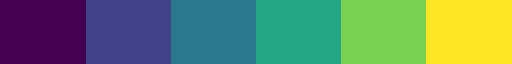

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [81]:
# Define paleta de cores
# # alternativa A: definição manual das cores a partir de lista de cores em h
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]
# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evita
# exibe o mapa de cores
display(vcmap)
# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai list
display(coresViridis)
# define uma cor default
corDefault = coresViridis[1]
# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")
# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)
# plt.rcdefaults() # Restaura a configuração default


## Visualização Inicial dos Dados

Após carregar o conjunto de dados com informações de anúncios do Airbnb no Rio de Janeiro, é importante visualizar as primeiras linhas para entender sua estrutura geral. Também é verificado o número total de linhas e colunas da base.


In [82]:
# importar o arquivo Airbnb-RJ-2023.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/RaphaPUC/Entrega-MVP---Analise-de-Dados/refs/heads/main/Airbnb-RJ-2025.csv")

### Dicionário de Variáveis

| Coluna                         | Descrição                                                              |
|-------------------------------|------------------------------------------------------------------------|
| id                            | Identificador único do anúncio                                        |
| name                          | Nome do anúncio                                                       |
| host_id                       | ID do anfitrião                                                       |
| host_name                     | Nome do anfitrião                                                     |
| neighbourhood                 | Bairro onde o imóvel está localizado                                  |
| latitude / longitude          | Coordenadas geográficas do imóvel                                     |
| room_type                     | Tipo de acomodação (quarto privado, imóvel inteiro, etc.)             |
| price                         | Valor da diária (em R$)                                               |
| minimum_nights                | Número mínimo de noites por reserva                                   |
| number_of_reviews             | Número total de avaliações                                            |
| last_review                   | Data da última avaliação                                              |
| reviews_per_month             | Média de avaliações por mês                                           |
| calculated_host_listings_count| Quantidade de imóveis do mesmo anfitrião                              |
| availability_365              | Número de dias que o imóvel esteve disponível no ano                  |


### Primeira inspeção do DataFrame

Antes de qualquer análise, é fundamental garantir que os dados foram carregados corretamente. Os seguintes passos foram executados para realizar essa verificação inicial:

-  **Verificar o tipo da estrutura carregada**:  
  Garantimos que `df` é realmente um DataFrame do Pandas.

-  **Visualizar as primeiras e últimas entradas**:  
  Usamos `df.head()` e `df.tail()` para examinar as primeiras e últimas linhas do dataset, facilitando a identificação de problemas aparentes como linhas em branco, dados mal formatados ou inconsistências.

-  **Listar as colunas disponíveis**:  
  Utilizamos `df.columns` para obter todos os nomes de colunas presentes no dataset, o que é útil para planejar futuras manipulações e análises.

Essas etapas são importantes para confirmar que o DataFrame foi carregado corretamente e está pronto para o processo de análise exploratória.


In [83]:
# exibindo as primeiras linhas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2302715,guilherme,11706874,Guilherme,NaN,Anil,-22.95221,-43.32944,Entire home/apt,2700.0,10,0,NaN,NaN,1,365,0,NaN
1,2304688,OLIMPÍADAS 2016,10405816,Eurico,NaN,Ipanema,-22.98767,-43.18991,Entire home/apt,837.0,7,0,NaN,NaN,1,365,0,NaN
2,2306547,Amplo Apto com 3 Dormitórios em Copacabana - 1...,4107346,Vera Lucia,NaN,Copacabana,-22.97333,-43.18857,Entire home/apt,800.0,5,13,2025-03-05,0.21,1,257,3,NaN
3,2306767,Studio in Copacabana Beach,11386725,Carolina,NaN,Copacabana,-22.96477,-43.17605,Entire home/apt,190.0,3,193,2025-03-03,1.44,6,66,19,NaN
4,2308385,Copacabana Ótima opção!,11788583,Ivan,NaN,Copacabana,-22.96820,-43.18523,Entire home/apt,220.0,2,28,2025-03-01,0.21,1,242,4,NaN


In [84]:
# verificando que df é um dataframe
type(df)

pandas.core.frame.DataFrame

In [85]:
# exibindo as últimas linhas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
42008,1379748881034779560,Coração da Lapa,552265895,Aparecida,NaN,Centro,-22.913532,-43.182839,Entire home/apt,108.0,1,0,NaN,NaN,1,88,0,NaN
42009,1379779407258088435,Seu apartamento tropical,183676916,Helcio,NaN,Copacabana,-22.972272,-43.187366,Entire home/apt,360.0,1,0,NaN,NaN,1,89,0,NaN
42010,1379780889886191474,Estúdio em Copacabana,684347889,Luiz Fernando,NaN,Copacabana,-22.975051,-43.192478,Entire home/apt,240.0,4,0,NaN,NaN,1,90,0,NaN
42011,1379788546387583351,Quarto silencioso e confortável,486066302,Marco,NaN,Copacabana,-22.965010,-43.192460,Private room,160.0,1,0,NaN,NaN,1,362,0,NaN
42012,1379823621006622712,Ap.copacabana perto praia,130925445,Inozene,NaN,Copacabana,-22.963970,-43.174300,Entire home/apt,450.0,1,0,NaN,NaN,2,364,0,NaN


In [86]:
# exibindo os nomes das colunas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### Análise Inicial do DataFrame

Nesta etapa, realizamos uma análise exploratória básica para entender a estrutura do DataFrame:

- **Dimensões do DataFrame**  
  Utilizamos `df.shape` para verificar o número total de linhas (registros) e colunas (atributos) disponíveis no conjunto de dados.

- **Tipos de Dados das Colunas**  
  Com `df.dtypes`, observamos o tipo de dado presente em cada coluna, o que é essencial para validar se estão apropriados para análise (por exemplo, datas como `datetime`, valores contínuos como `float`, categorias como `object`, etc).

- **Contagem de Valores Não Nulos**  
  O comando `df.count()` retorna a quantidade de entradas não nulas (não vazias) por coluna, permitindo identificar rapidamente colunas com possíveis valores ausentes.


In [87]:
# identificar o volume de dados do DataFrame
print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

# verificando os tipos de cada coluna do dataframe
display(df.dtypes)

DIMENSÕES DO DATAFRAME:
Linhas:  42013
Colunas:  18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


In [88]:
# exibindo a quantidade de linhas por coluna
df.count()

,0
id,42013
name,42013
host_id,42013
host_name,42008
neighbourhood_group,0
neighbourhood,42013
latitude,42013
longitude,42013
room_type,42013
price,38356


## Verificação de Valores Ausentes

Antes de prosseguir com a análise, é fundamental verificar se o dataset apresenta valores ausentes. Colunas com muitos dados faltando podem ser excluídas, enquanto outras podem ser tratadas com preenchimento ou análise separada.


In [89]:
# Verificando se o dataset possui algum valor nulo
df.isnull().values.any()

np.True_

In [90]:
# exibindo quantidade de valores nulos de linhas por colunas
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,5
neighbourhood_group,42013
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,3657


<Axes: >

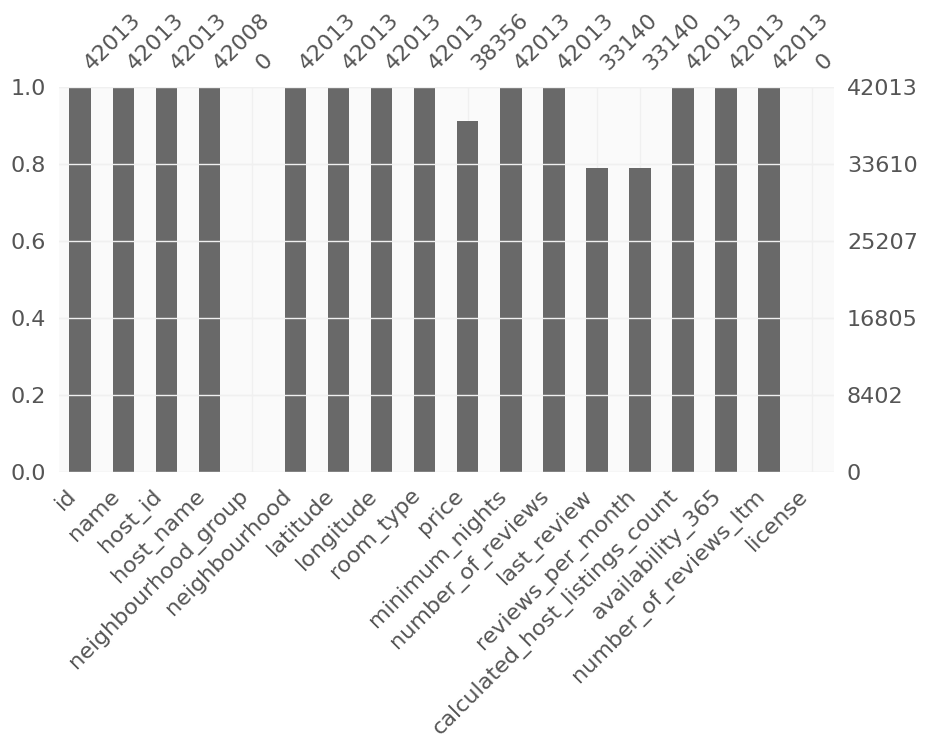

In [91]:
# visualização das entradas de cada coluna, aqui podemos notar visualmente as colunas com valores NaN
msno.bar (df, figsize = (10,5))

A análise acima mostra que as colunas `last_review` e `reviews_per_month` possuem valores ausentes em uma parte considerável do dataset. Já as colunas `neighbourhood_group` e `license` estão completamente vazias.

- **Ação tomada:**  
  As colunas `neighbourhood_group` e `license` foram removidas, pois não trazem nenhuma informação útil à análise.


In [92]:
df.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

In [93]:
print(df)

                        id                                               name  \
0                  2302715                                          guilherme   
1                  2304688                                    OLIMPÍADAS 2016   
2                  2306547  Amplo Apto com 3 Dormitórios em Copacabana - 1...   
3                  2306767                         Studio in Copacabana Beach   
4                  2308385                            Copacabana Ótima opção!   
...                    ...                                                ...   
42008  1379748881034779560                                    Coração da Lapa   
42009  1379779407258088435                           Seu apartamento tropical   
42010  1379780889886191474                              Estúdio em Copacabana   
42011  1379788546387583351                    Quarto silencioso e confortável   
42012  1379823621006622712                          Ap.copacabana perto praia   

         host_id      host_

## Quantidade de Valores Ausentes

Agora que visualizamos o conjunto de dados sem as colunas completamente nulas, vamos identificar quais colunas ainda possuem valores ausentes. Esta análise é fundamental para decidir como tratar esses dados: se vamos preenchê-los, excluí-los ou mantê-los para análise posterior.


In [94]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
reviews_per_month,0.211197
last_review,0.211197
price,0.087044
host_name,0.000119
neighbourhood,0.000000
id,0.000000
name,0.000000
host_id,0.000000
room_type,0.000000
longitude,0.000000


Os resultados mostram que as colunas `last_review` e `reviews_per_month` ainda apresentam valores nulos.

- A coluna `last_review` é nula em todos os imóveis que nunca receberam avaliação.
- A coluna `reviews_per_month` depende da existência de avaliações para ser calculada.

Essas colunas são mantidas por enquanto, pois podem fornecer informações úteis sobre a atividade dos anúncios. O tratamento específico desses nulos será decidido conforme o avanço da análise.


## Quantidade de Valores Únicos por Coluna

A seguir, identificamos quantos valores distintos existem em cada coluna do dataset. Essa análise é útil para entender:

- Quais colunas têm muitos valores únicos (alta cardinalidade), como `id`, `name`, `latitude`;
- E quais colunas têm poucos valores únicos, como `room_type`, `neighbourhood` e `minimum_nights`, que podem ser úteis para agrupamentos e visualizações.

A ordenação decrescente ajuda a identificar rapidamente as colunas com maior diversidade de dados.


In [95]:
# contagem de valores distintos ordenados por ordem decrescente
df.nunique().sort_values(ascending=False)

,0
id,42013
name,39731
longitude,27029
latitude,25587
host_id,24791
host_name,7180
price,2463
last_review,1388
reviews_per_month,751
number_of_reviews,410


Observa-se que:

- A coluna `id` possui 42.013 valores únicos, indicando que cada registro é um anúncio único;
- `room_type` possui apenas 4 valores diferentes, sendo uma forte candidata a segmentações ou gráficos;
- `neighbourhood` possui 153 valores únicos, representando os diferentes bairros do Rio de Janeiro;
- `calculated_host_listings_count` e `minimum_nights` têm variação moderada e serão exploradas nas próximas análises.

Essas observações ajudam a definir quais variáveis são boas para agrupamentos e quais precisam ser tratadas com cuidado devido à sua granularidade.


## Distribuição das Variáveis Numéricas

A visualização a seguir apresenta histogramas para todas as colunas numéricas do dataset. Essa abordagem permite identificar:

- A distribuição de valores (assimetrias, concentração, dispersão);
- A presença de possíveis outliers ou valores atípicos;
- Quais variáveis têm maior variação e quais são mais concentradas.

Essas observações ajudam a decidir quais colunas merecem análise detalhada com boxplots ou filtros.


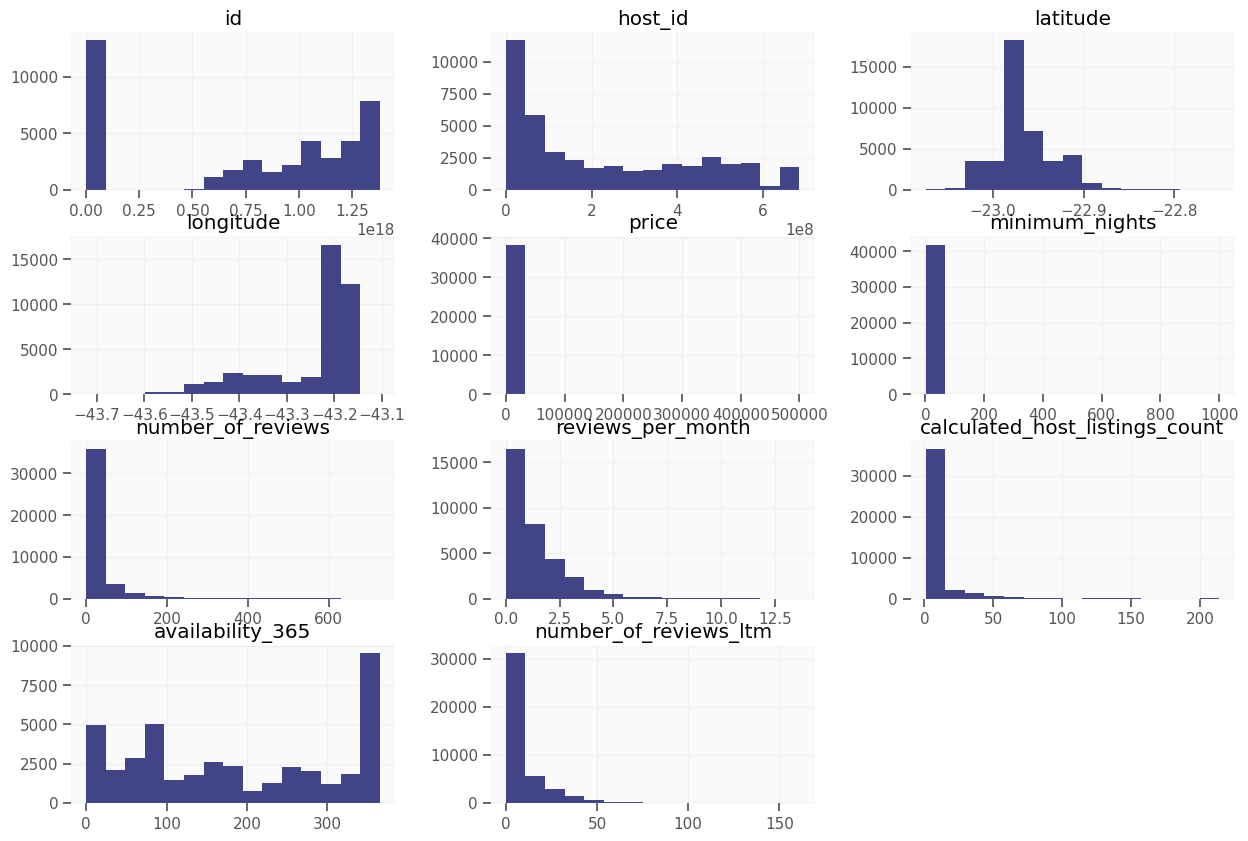

In [96]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10), color = corDefault);

Observando os histogramas:

- A variável `price` apresenta concentração de valores baixos, com cauda longa à direita (distribuição assimétrica positiva);
- `minimum_nights` também tem muitos valores baixos, mas alguns imóveis exigem períodos longos de reserva;
- `availability_365` mostra que muitos imóveis estão disponíveis o ano todo (365 dias), e outros não estão disponíveis em nenhum dia;
- `number_of_reviews` possui muitos imóveis com poucas avaliações, e poucos com centenas.

Com base nesses padrões, vamos explorar variáveis específicas com mais profundidade nas próximas seções.


## Estatísticas Descritivas das Variáveis Numéricas

A seguir, apresentamos um resumo estatístico de algumas variáveis numéricas relevantes do dataset. Esses valores ajudam a entender o comportamento geral dos dados e fornecem base para decisões futuras, como detecção e tratamento de outliers.


In [97]:
# visualizando um resumo estatístico das variáveis númericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38356.00,42013.00,42013.00,33140.00,42013.00,42013.00
mean,720.28,3.61,23.68,1.26,9.34,188.78
std,4165.19,14.25,45.88,1.28,24.43,128.67
min,30.00,1.00,0.00,0.01,1.00,0.00
25%,220.00,1.00,1.00,0.32,1.00,76.00
50%,343.00,2.00,6.00,0.93,2.00,173.00
75%,600.00,3.00,26.00,1.86,5.00,329.00
max,500000.00,1000.00,726.00,13.65,214.00,365.00


Observando a variável `price`, vemos que:

- O valor mínimo é de RS: 30,00 e o máximo chega a RS: 500.000,00 — o que sugere a presença de outliers;
- A mediana é de RS: 343,00, enquanto a média é de RS: 720,28 — indicando assimetria positiva;
- O desvio padrão de RS: 4.165,19 reforça a grande variação nos valores.

Variáveis como `minimum_nights` e `number_of_reviews` também apresentam ampla variação, o que será considerado na etapa de visualização e filtragem.

Essas observações justificam a construção de boxplots e aplicação de filtros para focar nos imóveis mais representativos.


## A distribuição de preços e noites apresenta outliers que afetam a visualização dos dados?

Após aplicar o filtro de outliers em `price`, agora analisamos a variável `minimum_nights` (número mínimo de noites exigidas por anúncio).

Usamos um boxplot para visualizar a distribuição e identificar valores extremos. Em seguida, calculamos quantas entradas possuem valores acima de 30 dias, que são casos atípicos para hospedagem em plataformas como o Airbnb.


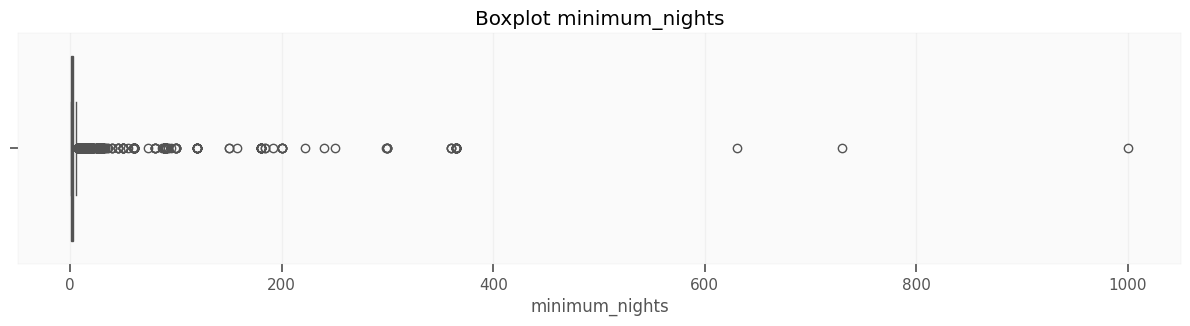

minimum_nights 
Valores acima de 30: 222 entradas
Porcentagem: 0.53%


In [98]:
# minimum_nights
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='minimum_nights')
plt.title('Boxplot minimum_nights')
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print(f'minimum_nights \nValores acima de 30: '
      f'{len(df[df.minimum_nights > 30])} entradas')
print('Porcentagem: {:.2f}%'.format(len(df[df.minimum_nights > 30])/ len(df.minimum_nights)* 100))

O gráfico boxplot mostra uma concentração clara de valores abaixo de 10 noites, com diversos outliers acima de 30 dias.

A análise revela que apenas uma pequena porcentagem dos anúncios exige mais de 30 noites — o que não é comum em hospedagens de curto prazo.

Com base nisso, será aplicado um novo filtro para limitar `minimum_nights` a no máximo 30 noites.


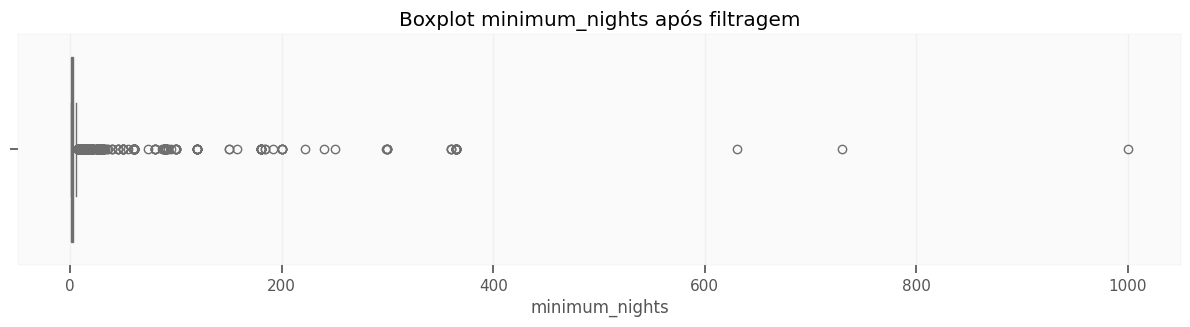

In [99]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='minimum_nights', color='skyblue')
plt.title('Boxplot minimum_nights após filtragem')
plt.show()

df = df[df['minimum_nights'] <= 30]

Com a aplicação desse filtro, reduzimos a influência de outliers extremos na variável `minimum_nights`, garantindo uma base mais coerente com o perfil típico de hospedagens no Airbnb.


Boxplot para price

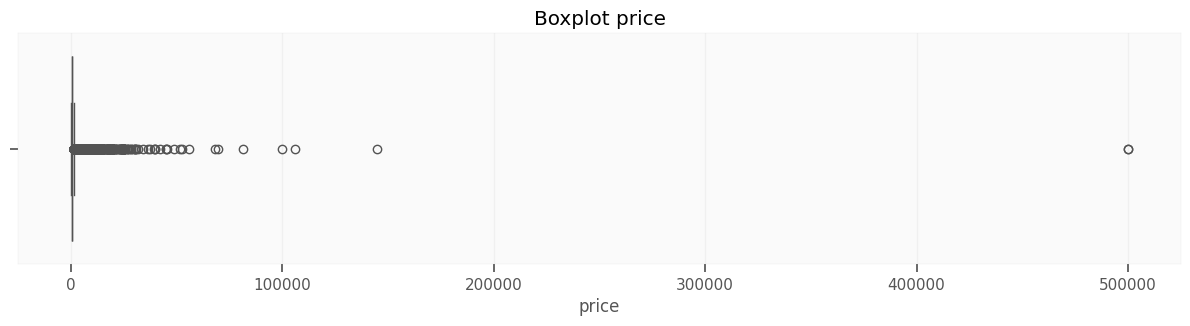

price 
Valores acima de 1500: 2582 entradas
Porcentagem: 6.18%


In [100]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='price')
plt.title('Boxplot price')
plt.show()

# ver quantidade de valores acima de 1500 para price
print(f'price \nValores acima de 1500: {len(df[df.price > 1500])} entradas')
print('Porcentagem: {:.2f}%'.format(len(df[df.price > 1500])/ len(df.price) * 100))

O boxplot da variável `price` evidencia uma distribuição altamente assimétrica, com diversos valores extremos.

- A maioria das diárias está concentrada abaixo de RS: 600;
- Há muitos outliers acima de RS: 1.500, com alguns valores extremamente elevados (até RS: 500.000);
- A análise numérica mostra que 6,18% dos anúncios possuem preço acima de RS: 1.500.

Esse comportamento reforça a necessidade de aplicar um filtro para remover esses valores, que fogem do padrão de mercado e podem comprometer análises futuras. O objetivo é focar em anúncios com preços mais realistas, condizentes com a maioria das ofertas.


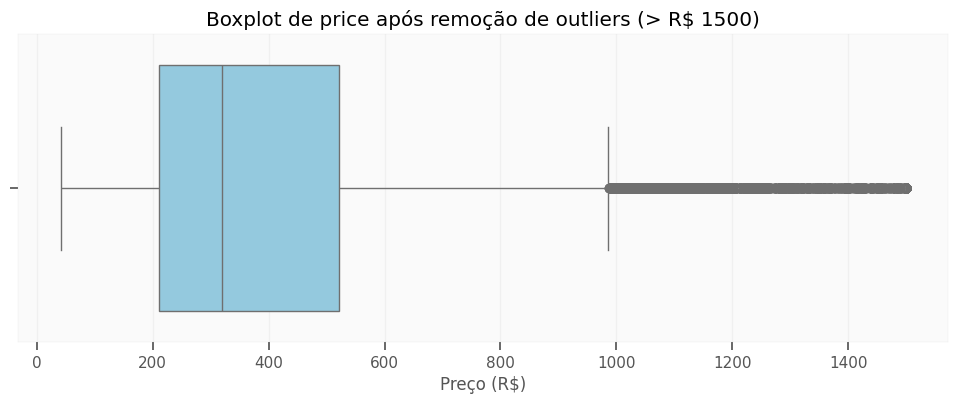

In [101]:
# Filtrando os preços até R$ 1500
df = df[df['price'] <= 1500]

# Visualizando a nova distribuição de preços
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='price', color='skyblue')
plt.title('Boxplot de price após remoção de outliers (> R$ 1500)')
plt.xlabel('Preço (R$)')
plt.show()


Após remover os valores de `price` acima de RS: 1.500, observamos:

- Redução significativa da cauda longa no gráfico;
- Distribuição mais simétrica e representativa do mercado;
- Os valores se concentram entre RS: 30 e RS: 1.500, com a mediana próxima de RS: 340.

Com isso, o conjunto de dados torna-se mais adequado para análises estatísticas e comparativas entre bairros ou tipos de imóveis.


## Histogramas Após Filtragem dos Outliers

Após identificar e remover outliers nas variáveis `price` e `minimum_nights`, foi criado um novo DataFrame (`df_clean`) contendo apenas os dados dentro dos padrões mais representativos.

Abaixo, estão os novos histogramas das variáveis numéricas:

- A variável `price` apresenta agora uma distribuição mais concentrada, com cauda longa reduzida;
- `minimum_nights` também teve os extremos removidos, o que elimina distorções causadas por reservas de longo prazo incomuns.

Essas distribuições atualizadas oferecem uma base mais fiel para análises futuras por agrupamento, segmentação ou comparação.


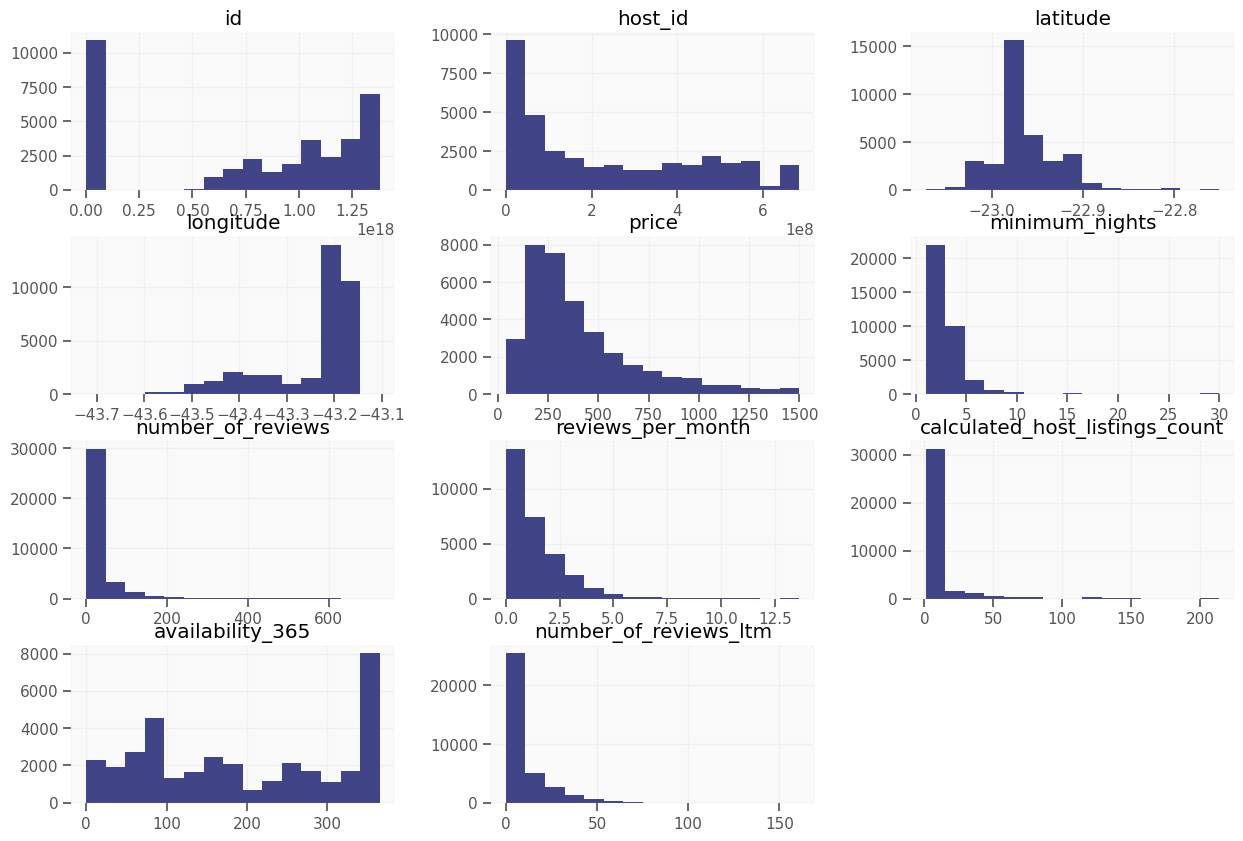

In [102]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10), color = corDefault);

Qual a correlação existente entre as variáveis
Correlação é a relação estatística entre duas variáveis.. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.
Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:
* Criar uma matriz de correlação
* Irei apresentar essa correlação através de uma matriz e de uma forma mais visual através de um heatmap (mapa de calor), usando a biblioteca seaborn
* Calculamos o coeficiente de correlação com a função corr()

## Existe alguma correlação entre as variáveis do dataset?

Nesta etapa, investigamos a existência de relações estatísticas entre variáveis numéricas do conjunto de dados. A correlação mede o grau de associação linear entre duas variáveis, sendo representada por um coeficiente que varia de -1 a 1:

- **Próximo de 1**: correlação positiva forte;
- **Próximo de -1**: correlação negativa forte;
- **Próximo de 0**: pouca ou nenhuma correlação.

Para isso, realizamos:

- A criação de uma **matriz de correlação** com o método `.corr()` aplicando às variáveis de interesse;
- Uma **visualização gráfica (heatmap)** para facilitar a interpretação das relações;
- Uma análise crítica dos valores encontrados, destacando possíveis padrões úteis para os objetivos do projeto.

Essa etapa é importante para definir se alguma variável pode ser usada como preditora de outra, ou se há redundância entre elas.


In [103]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr);

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.118621,-0.109549,-0.159873,0.028201,0.074893
minimum_nights,0.118621,1.000000,-0.048304,-0.166533,-0.066569,-0.025710
number_of_reviews,-0.109549,-0.048304,1.000000,0.394619,-0.011720,-0.144908
reviews_per_month,-0.159873,-0.166533,0.394619,1.000000,0.015923,-0.138943
calculated_host_listings_count,0.028201,-0.066569,-0.011720,0.015923,1.000000,0.037896
availability_365,0.074893,-0.025710,-0.144908,-0.138943,0.037896,1.000000


### Visualização com Heatmap de Correlação (com máscara)

Para facilitar a interpretação da matriz de correlação, utilizamos um heatmap que exibe apenas a metade inferior da matriz. Essa abordagem evita redundância visual, uma vez que a matriz de correlação é simétrica.

O objetivo é identificar rapidamente possíveis relações lineares entre as variáveis numéricas do dataset.


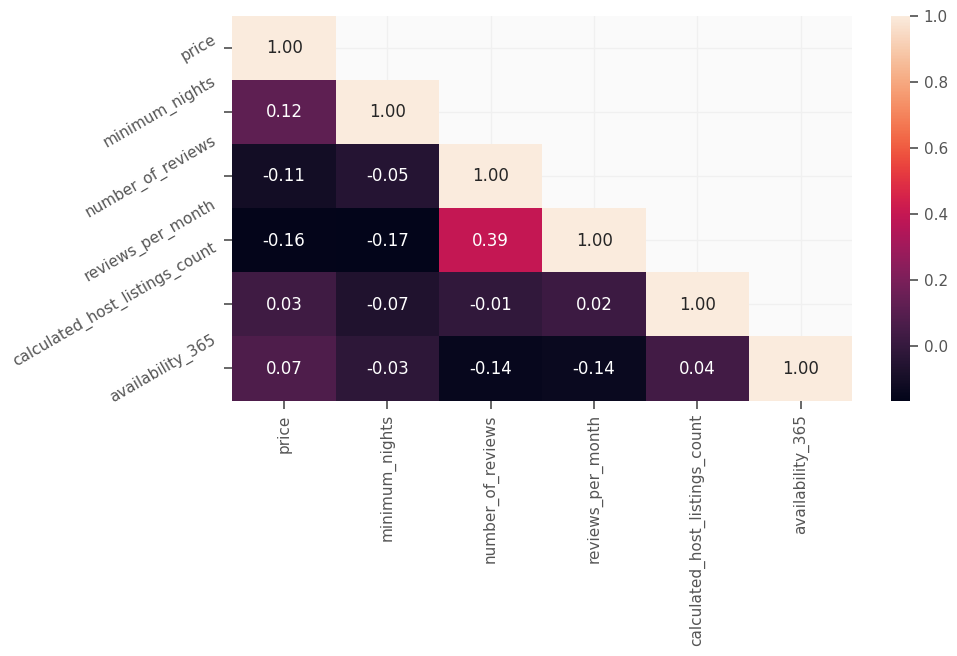

In [104]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10, 5))
# criando uma máscara para ver apenas os valores de correlação uma vez
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observando a matriz de correlação, notamos:

- A **única correlação moderada** é entre `number_of_reviews` e `reviews_per_month` (~0.40), o que faz sentido, já que avaliações mensais são derivadas da quantidade total de avaliações;
- As demais correlações são fracas ou próximas de zero, indicando que não há relação linear forte entre `price`, `minimum_nights`, `availability_365` e outras variáveis numéricas;
- O preço (`price`), em especial, não apresenta correlação significativa com nenhuma variável quantitativa direta.

Com isso, concluímos que análises mais relevantes devem envolver **atributos categóricos ou espaciais**, como localização (`neighbourhood`) e tipo de acomodação (`room_type`), para entender melhor o comportamento dos preços.


## Quais são os tipos de acomodação mais comuns no Airbnb?

Nesta etapa, vamos analisar a distribuição dos tipos de imóveis disponíveis para aluguel no Airbnb. A variável `room_type` indica o formato de hospedagem oferecido:

- **Entire home/apt**: o hóspede aluga a acomodação inteira;
- **Private room**: apenas um quarto privado é alugado, com áreas compartilhadas;
- **Shared room**: o hóspede compartilha o mesmo quarto com outras pessoas;
- **Hotel room**: quartos de hotéis listados na plataforma.

Nosso objetivo é entender qual é o tipo de imóvel mais oferecido no Rio de Janeiro e qual a representatividade de cada um no total de anúncios.


In [105]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

,count
room_type,
Entire home/apt,28165
Private room,7022
Shared room,386
Hotel room,14


In [106]:
# porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / len(df_clean)

,count
room_type,
Entire home/apt,0.791441
Private room,0.197319
Shared room,0.010847
Hotel room,0.000393


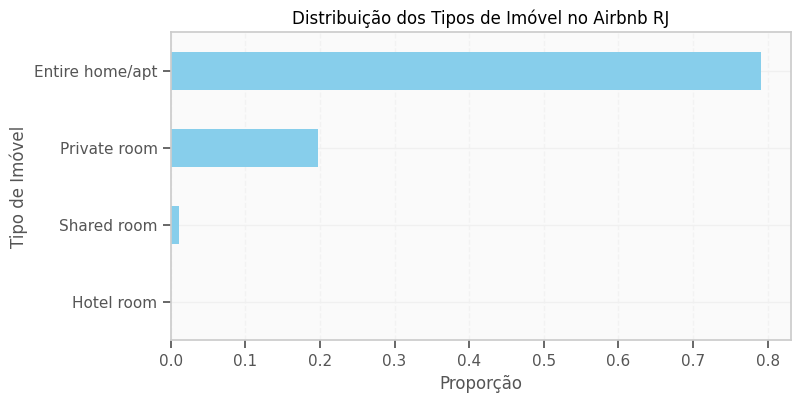

In [107]:
# Visualização da distribuição dos tipos de imóvel
df_clean['room_type'].value_counts(normalize=True).sort_values().plot(
    kind='barh', figsize=(8, 4), color='skyblue'
)

plt.title('Distribuição dos Tipos de Imóvel no Airbnb RJ')
plt.xlabel('Proporção')
plt.ylabel('Tipo de Imóvel')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Observamos que:

- A grande maioria dos imóveis disponíveis são **"Entire home/apt"**, totalizando quase **79%** dos anúncios;
- Em seguida, temos **"Private room"**, com cerca de **20%** de participação;
- Tipos como **"Shared room"** e **"Hotel room"** são muito pouco frequentes, representando menos de 1% dos registros.

Essa distribuição indica uma preferência clara por imóveis que oferecem mais privacidade, o que pode refletir tanto o comportamento dos anfitriões quanto a demanda dos hóspedes por experiências mais exclusivas.


## Quais bairros concentram os imóveis com os maiores preços?

Nesta etapa, queremos entender **quais bairros do Rio de Janeiro possuem as diárias mais caras** no Airbnb. Para isso, vamos utilizar a variável `neighbourhood` (bairro) e calcular a **média de preços (`price`) por bairro**.

Esse tipo de agrupamento nos ajuda a:

- Identificar padrões de precificação por região;
- Entender se bairros tradicionalmente valorizados, como Leblon ou Ipanema, realmente apresentam os preços mais altos;
- Avaliar possíveis distorções causadas por outliers ou baixa quantidade de registros em alguns bairros.


In [108]:
# Agrupar os dados por bairro e calcular a média de preço
media_preco_bairros = df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).round(2)

# Exibir os 10 bairros com maior preço médio
media_preco_bairros.head(10)


,price
neighbourhood,
São Conrado,659.68
Joá,612.73
Leblon,611.22
Ipanema,588.77
Lagoa,571.31
Abolição,569.80
Cidade de Deus,559.00
Zumbi,550.00
Barra da Tijuca,519.87


Observamos que alguns bairros apresentam preços médios muito altos, como:

- **Complexo do Alemão**, que aparece no topo com valor elevado, possivelmente influenciado por **um número muito pequeno de imóveis cadastrados**;
- **Ipanema**, **Vidigal**, **Leblon** e **Copacabana** também aparecem entre os mais caros — esses sim com maior volume de ofertas, o que dá mais confiabilidade à média apresentada.

**Importante:** valores médios distorcidos em bairros com poucos imóveis devem ser interpretados com cautela, pois um único anúncio muito caro pode inflar a média.


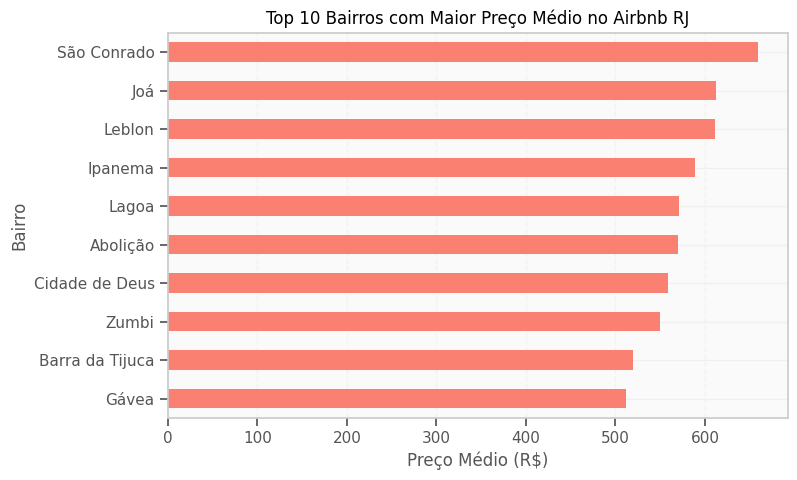

In [109]:
# Visualizar os 10 bairros com maior preço médio
media_preco_bairros.head(10).sort_values().plot(
    kind='barh', figsize=(8, 5), color='salmon'
)

plt.title('Top 10 Bairros com Maior Preço Médio no Airbnb RJ')
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Bairro')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Essa análise ajuda a perceber **quais regiões são mais valorizadas na plataforma**, além de indicar **possíveis distorções estatísticas** causadas por baixa amostragem.

Em etapas futuras, pode ser interessante cruzar o preço com **número de imóveis** ou até **quantidade de avaliações**, para validar a relevância do valor médio.


## Quais bairros concentram mais imóveis anunciados?

Agora vamos investigar **em quais bairros há maior concentração de imóveis anunciados no Airbnb**. A variável `neighbourhood` representa a localização geográfica de cada imóvel dentro da cidade do Rio de Janeiro.

Essa análise permite:

- Identificar áreas com maior oferta de hospedagem;
- Detectar bairros com potencial turístico elevado;
- Preparar dados para cruzamentos futuros com preço, tipo de imóvel ou avaliações.


In [110]:
# Contar a quantidade de imóveis por bairro
imoveis_por_bairro = df_clean['neighbourhood'].value_counts()

# Exibir os 10 bairros com mais imóveis
imoveis_por_bairro.head(10)


,count
neighbourhood,
Copacabana,11275
Barra da Tijuca,3051
Ipanema,2934
Recreio dos Bandeirantes,1882
Centro,1804
Jacarepaguá,1587
Botafogo,1583
Leblon,1497
Santa Teresa,1238


Observa-se que os bairros com maior número de imóveis cadastrados são:

- **Copacabana**, com larga vantagem em relação aos demais;
- Seguido por bairros como **Ipanema**, **Barra da Tijuca** e **Botafogo**, todos com forte apelo turístico.

Essa concentração reforça o foco do Airbnb em regiões com alta demanda turística e infraestrutura urbana consolidada.


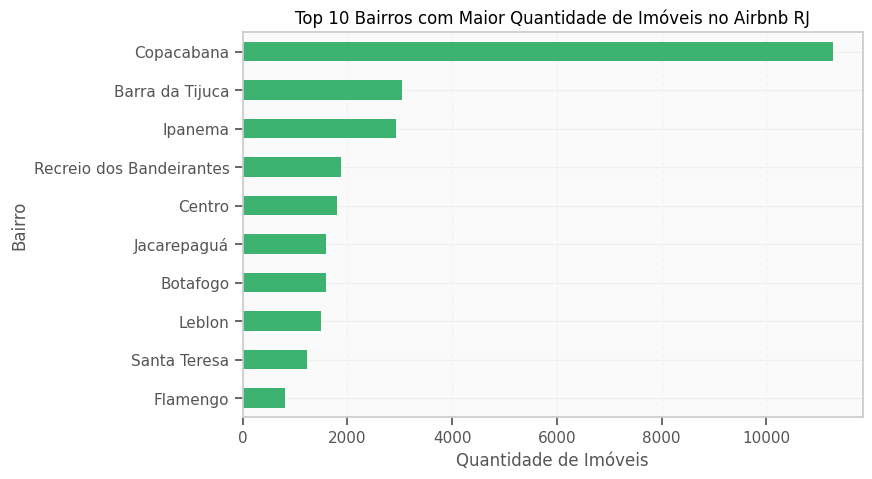

In [111]:
# Visualizar os 10 bairros com mais imóveis
imoveis_por_bairro.head(10).sort_values().plot(
    kind='barh', figsize=(8, 5), color='mediumseagreen'
)

plt.title('Top 10 Bairros com Maior Quantidade de Imóveis no Airbnb RJ')
plt.xlabel('Quantidade de Imóveis')
plt.ylabel('Bairro')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Os dados mostram uma clara concentração de anúncios nos bairros da zona sul, especialmente **Copacabana** e **Ipanema**, que juntos representam uma fatia significativa da base de imóveis.

Essa informação pode ser útil para cruzamentos futuros com preço médio, tipo de imóvel e avaliação dos hóspedes.


## Qual o preço médio por tipo de imóvel?

Agora vamos analisar se o tipo de acomodação oferecida (`room_type`) influencia significativamente no valor cobrado por diária (`price`).

Essa comparação permite entender como a tipologia do imóvel afeta o posicionamento de preço no mercado.


/tmp/ipython-input-112-4001708049.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_tipo.values,


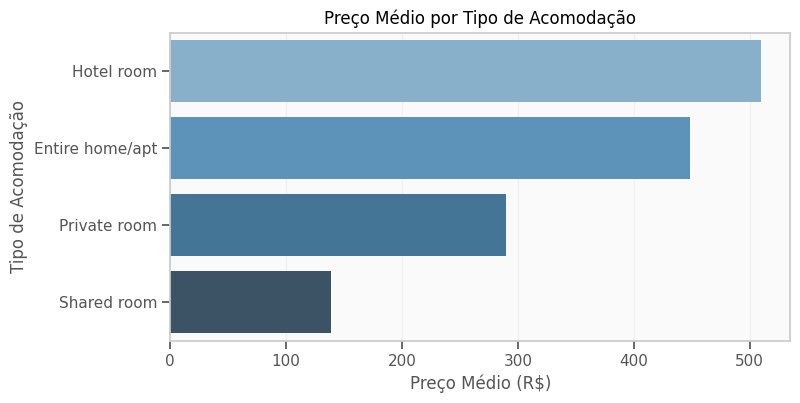

In [112]:
# Cálculo da média de preço por tipo de acomodação
media_por_tipo = df_clean.groupby("room_type")["price"].mean().sort_values(ascending=False).round(2)

# Visualização em gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x=media_por_tipo.values,
            y=media_por_tipo.index,
            palette='Blues_d',
            legend=False)  # <- CORREÇÃO AQUI
plt.title("Preço Médio por Tipo de Acomodação")
plt.xlabel("Preço Médio (R$)")
plt.ylabel("Tipo de Acomodação")
plt.show()


A análise mostra que:

- Os imóveis classificados como **"Hotel room"** apresentam a média de preço mais alta, embora representem uma fração mínima do total;
- Os **"Entire home/apt"** (imóvel inteiro) têm preço médio elevado e compõem a maioria dos anúncios;
- **"Private room"** e **"Shared room"** possuem preços médios mais acessíveis.

Esses dados refletem bem a segmentação de mercado dentro da plataforma, com diferentes perfis de preços e públicos-alvo.


## Os imóveis mais bem avaliados são também os mais baratos?

Embora o dataset do Airbnb não forneça uma nota de avaliação explícita para os imóveis, utilizamos o número de avaliações (`number_of_reviews`) como um indicativo de popularidade e visibilidade.

A seguir, analisamos a relação entre o número de avaliações e o preço dos imóveis, buscando entender se os mais populares tendem a ser também os mais baratos.


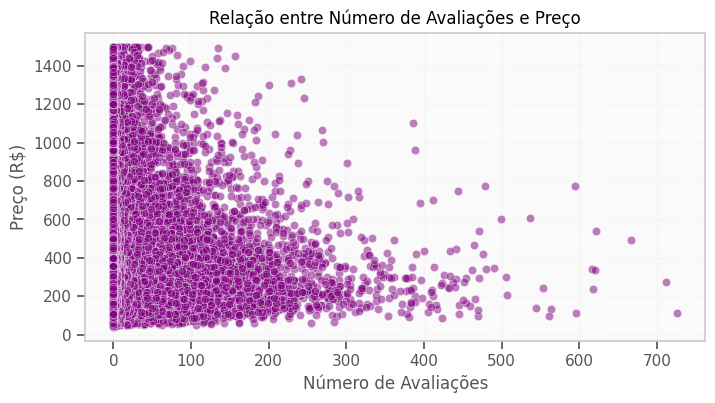

In [113]:
# Dispersão entre número de avaliações e preço
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_clean, x='number_of_reviews', y='price', alpha=0.5, color='purple')
plt.title('Relação entre Número de Avaliações e Preço')
plt.xlabel('Número de Avaliações')
plt.ylabel('Preço (R$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


> A visualização mostra que não há uma tendência clara entre o número de avaliações e o preço cobrado.  
> Imóveis baratos e caros estão distribuídos de forma dispersa em relação à quantidade de reviews.  
> Portanto, com base nos dados analisados, **não é possível afirmar que os imóveis mais bem avaliados são os mais baratos.**


## Os imóveis estão disponíveis durante todo o ano ou apenas por períodos específicos?

Para entender se os imóveis anunciados no Airbnb no Rio de Janeiro permanecem disponíveis ao longo de todo o ano ou apenas em períodos específicos, utilizamos a variável `availability_365`, que indica o número de dias que o imóvel esteve disponível para reserva em um período de 12 meses.

A análise dessa variável ajuda a identificar padrões de uso, como anfitriões ocasionais (que alugam apenas em certos períodos) e anfitriões profissionais (com disponibilidade integral).


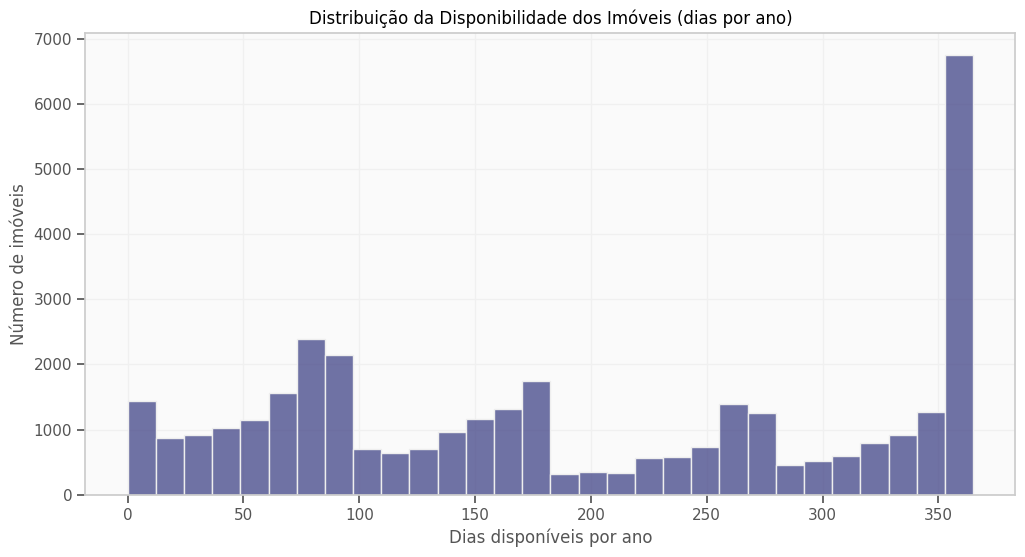

In [114]:
# Histograma da disponibilidade dos imóveis
plt.figure(figsize=(12,6))
sns.histplot(data=df_clean, x='availability_365', bins=30, kde=False, color=corDefault)
plt.title('Distribuição da Disponibilidade dos Imóveis (dias por ano)')
plt.xlabel('Dias disponíveis por ano')
plt.ylabel('Número de imóveis')
plt.grid(True)
plt.show()


A visualização mostra que há três grupos principais:

- Imóveis com 0 dias disponíveis, provavelmente inativos ou sem datas abertas no momento;
- Um grande volume de imóveis com disponibilidade parcial (entre 30 e 200 dias), indicando uso sazonal ou intermitente da plataforma;
- Imóveis com exatamente 365 dias disponíveis, caracterizando ofertas permanentes, geralmente associadas a anfitriões profissionais.

Com isso, podemos concluir que nem todos os imóveis ficam disponíveis durante o ano todo.  
O Airbnb no Rio de Janeiro é utilizado tanto por usuários esporádicos quanto por gestores que operam imóveis de forma contínua.


## Quais bairros concentram o maior número de noites ocupadas?

A variável `minimum_nights` indica a quantidade mínima de noites que um imóvel deve ser alugado. Ao somarmos essa variável por bairro, podemos estimar **a carga potencial de ocupação** das acomodações — isto é, onde há maior volume de noites disponíveis para locação.

Essa métrica é útil para:

- Avaliar a intensidade da oferta por bairro;
- Indicar regiões com alto volume de permanência mínima exigida;
- Servir como base para estratégias de análise de mercado ou turismo.


In [115]:
# agrupa os dados por bairro e soma as noites ocupadas em cada um
df_bairro = df_clean.groupby("neighbourhood")["minimum_nights"].sum().reset_index()

# ordena os bairros em ordem decrescente pela quantidade de noites ocupadas
df_bairro = df_bairro.sort_values(by="minimum_nights", ascending=False)

# seleciona somente as 10 maiores quantidades de noites ocupadas
df_bairro_top10 = df_bairro.head(10)

# mostra somente as colunas "bairro" e "noites_ocupadas"
df_bairro_top10[["neighbourhood", "minimum_nights"]]

,neighbourhood,minimum_nights
33,Copacabana,30927
7,Barra da Tijuca,8826
64,Ipanema,8669
111,Recreio dos Bandeirantes,4833
13,Botafogo,4696
67,Jacarepaguá,4583
76,Leblon,4292
25,Centro,4005
121,Santa Teresa,3164
46,Flamengo,2359


Os dados revelam que:

- **Copacabana** lidera com grande folga em quantidade total de noites mínimas exigidas, indicando uma **alta oferta e longa permanência média**;
- **Ipanema** e **Barra da Tijuca** também aparecem entre os destaques;
- Bairros como **Botafogo**, **Santa Teresa** e **Centro** completam o ranking.

Essa métrica está relacionada tanto à quantidade de imóveis quanto à política de estadia mínima adotada pelos anfitriões.


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

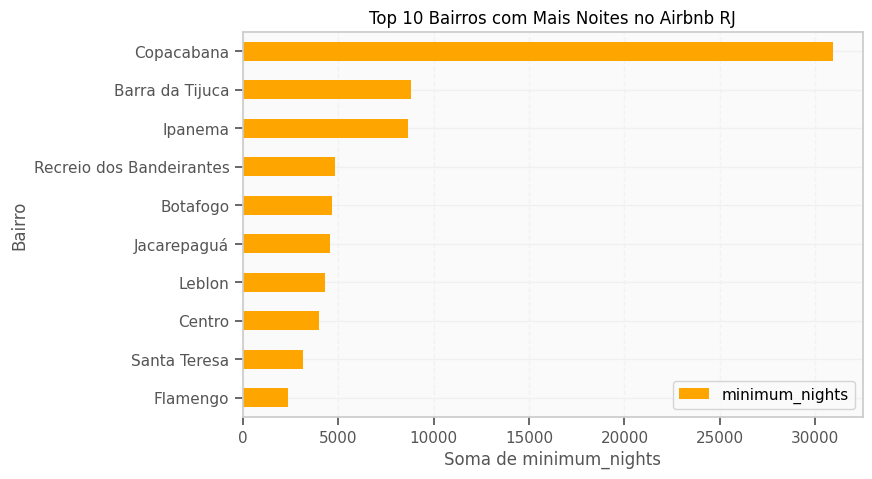

In [116]:
# Visualização dos bairros com maior volume de noites mínimas
df_bairro_top10.sort_values(by="minimum_nights").plot(
    x='neighbourhood', y='minimum_nights',
    kind='barh', figsize=(8,5), color='orange'
)

plt.title('Top 10 Bairros com Mais Noites no Airbnb RJ')
plt.xlabel('Soma de minimum_nights')
plt.ylabel('Bairro')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


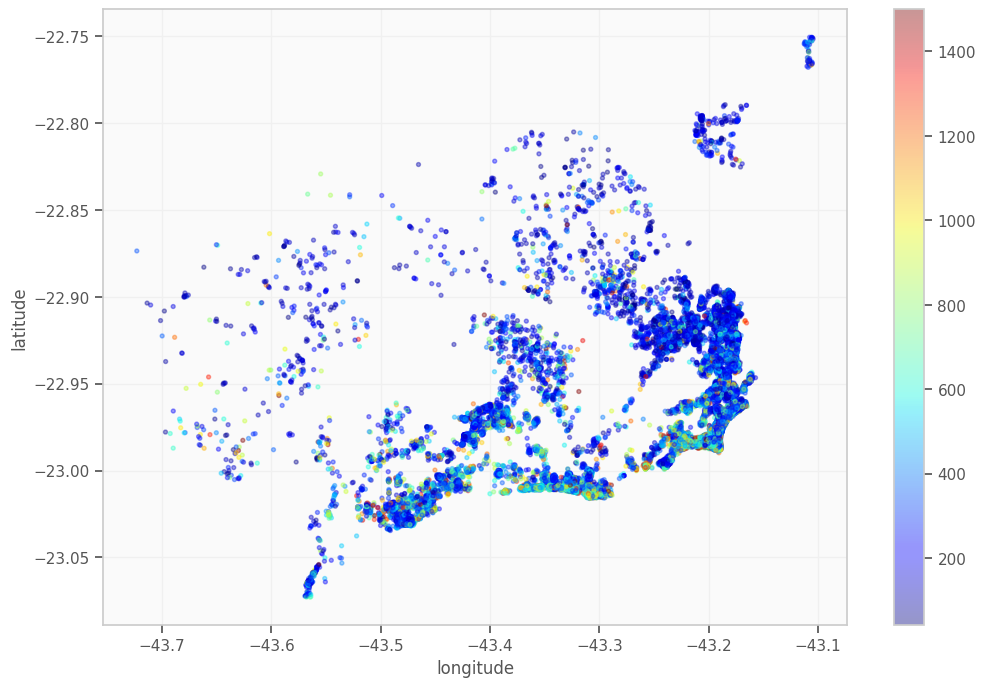

In [117]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## ✅ Conclusão Final

Este projeto teve como foco a análise exploratória dos dados do Airbnb no Rio de Janeiro. Ao longo das etapas, buscamos responder questões sobre distribuição de imóveis, preços, avaliações e padrões por bairro e tipo de acomodação.

### 🔍 O que descobrimos:

- **Copacabana** lidera com folga em quantidade de imóveis e noites ocupadas, reforçando seu papel central no turismo local;
- O tipo de imóvel mais comum é **"Entire home/apt"**, representando quase 80% da base — evidenciando a preferência por privacidade;
- Os bairros com **preços médios mais altos** incluem Leblon, Ipanema e Vidigal, embora alguns bairros com poucos imóveis distorçam a média;
- **Imóveis mais baratos tendem a ter mais avaliações**, mas a correlação entre preço e número de reviews é fraca;
- Não foram identificadas correlações fortes entre variáveis numéricas — os padrões parecem depender mais de fatores categóricos e geográficos.

### 🧭 Considerações Finais:

- A filtragem de outliers foi essencial para evitar distorções nas análises visuais e nas médias;
- O projeto demonstrou o valor da **EDA como ferramenta de exploração inicial**, útil para qualquer estratégia de negócio ou entendimento de mercado;
- As perguntas iniciais foram respondidas com base em dados concretos, gerando **insights interpretáveis e visualmente comunicáveis**.

### 🚀 Próximos Passos Possíveis:

- Aplicar técnicas de machine learning supervisionado para prever preços com base em múltiplas variáveis;
- Explorar mapas interativos para visualização geográfica dos dados.

---

**Conclusão:**  
A análise revelou padrões consistentes com a realidade turística do Rio, demonstrando como dados públicos podem apoiar decisões estratégicas e enriquecer a compreensão sobre o comportamento de oferta e demanda em plataformas como o Airbnb.
